In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline


In [6]:
cmap_bold = ListedColormap(["#FF0000","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBBBFF"]) 

In [7]:
#sigmoid function
def sigmoid(h): 
  return 1/(1+np.exp(-h))

#cross entropy objective function
def cross_entropy(y,p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

#accuracy function check accuracy of classifer function
def accuracy(y,y_hat):
  return np.mean(y==y_hat)   


In [8]:
#Logistic regression, also logistic regression is a classifer 

class logistic_regression():

  def __init__(self,thresh=0.5,):
    self.thresh = thresh
    self.w = None
    self.b = None

    #fit aka training, fit function doesnt need return, all it does is populate the weights
    #fit method is where all the setup happens
  def fit(self,X,y,eta=1e-3,epochs=1e3,show_curve=False):
    epochs = int(epochs)
    N,D = X.shape

    #initalize our weights w and bias b for now they are random
    self.w = np.random.randn(D) #matrix, eventually will be a tensor
    self.b = np.random.randn(1) #single quantity 

    J = np.zeros(epochs)

    for epoch in range(epochs):
      p_hat = self.__forward(X) #forward is used for neural nets
      J[epoch] = cross_entropy(y,p_hat) # calculating the error and eventually minimize via the loop
      #update rules every time we run the loop and lower the error
      self.w -= eta*(1/N)*X.T@(p_hat - y) # eta times 1/value of N times X  dot transpose matrix multiply p_hat minus y
      self.b -= eta*(1/N)*np.sum(p_hat - y) # eta times 1/Value of N times sum of p_hat minus y
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("TrainingCurve")
      plt.show()

  def __forward(self,X):
    return sigmoid(X@self.w+self.b)
  
  def predict(self,X):
    return (self.__forward(X) >= self.thresh).astype(np.int32)










In [15]:
def main():
  #generating data
  N = 1000
  D = 2

  X0 = np.random.randn((N//2),D) + np.array([1, 1])
  X1 = np.random.randn((N//2),D) + np.array([-1, -1])
  X = np.vstack((X0, X1))

  y = np.array([0]*(N//2) + [1]*(N//2))

#plotting them 
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
  plt.show()

#create a data frame
  df=pd.DataFrame(X)
  df=pd.concat([df, pd.DataFrame(y)], axis=1)
  df.to_csv("LogReg1.csv")

#use logistic regression fit and predict
  log_reg = logistic_regression()
  log_reg.fit(X, y, eta = 1e-1, show_curve = True)
  y_hat = log_reg.predict(X)

#print the accuracy
  print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")

#generating a field behind it to see whats it doing, draw a line in the training accuracy graph
  x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
  x2 = -(log_reg.b/log_reg.w[1]) - (log_reg.w[0]/log_reg.w[1])*x1

#graph everything
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
  plt.plot(x1, x2, color = "#000000", linewidth = 2)
  plt.show()

  xx1, xx2 = np.meshgrid(x1, x1)
  Z = log_reg.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)

  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
  plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

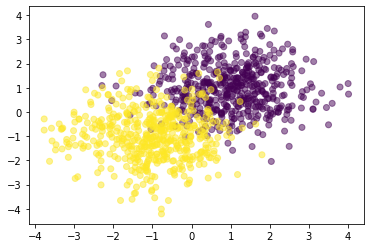

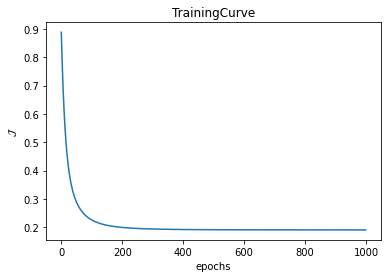

Training Accuracy: 0.9240


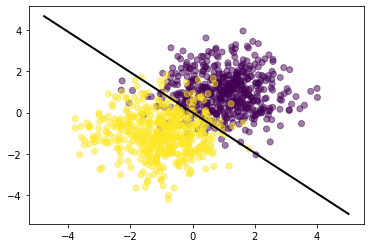

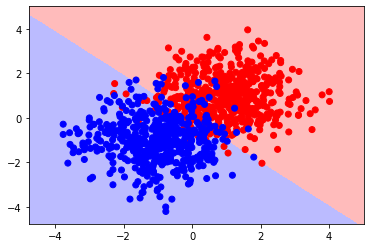

In [13]:
main()